In [44]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd

from collections import Counter


In [45]:
data_dir = 'data/images'

from pathlib import Path
loadpath = Path(data_dir)
filepaths = list(loadpath.glob('**/*.jpg'))
filepaths

[WindowsPath('data/images/113-5.jpg'),
 WindowsPath('data/images/125-5.jpg'),
 WindowsPath('data/images/127-5.jpg')]

In [47]:
for filepath in filepaths:
    print(filepath)

data\images\113-5.jpg
data\images\125-5.jpg
data\images\127-5.jpg


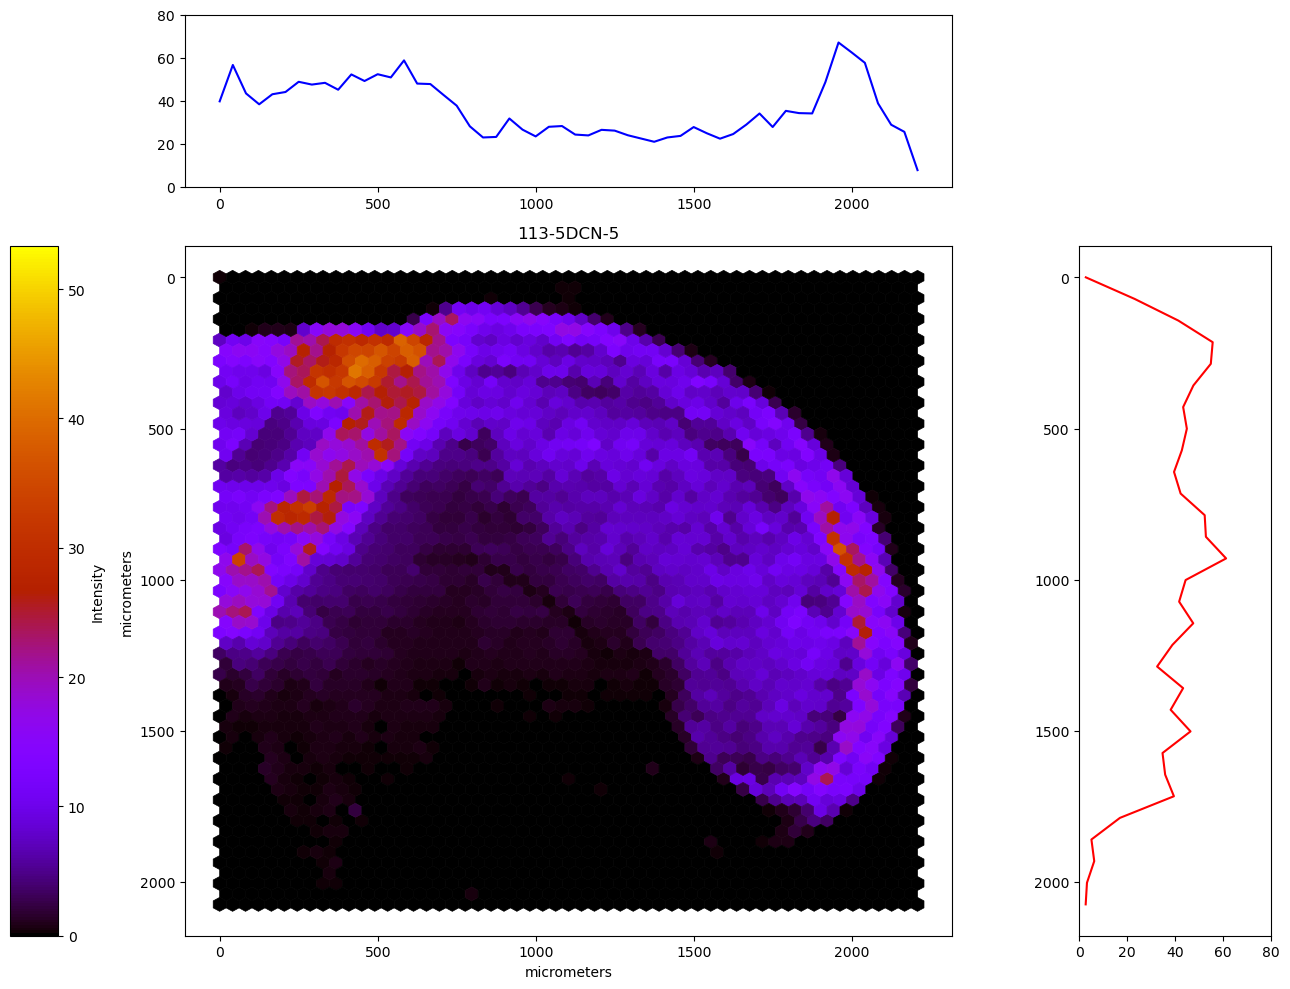

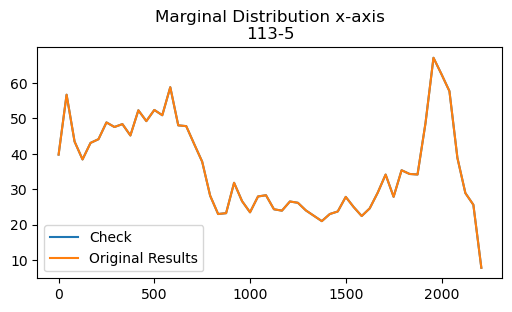

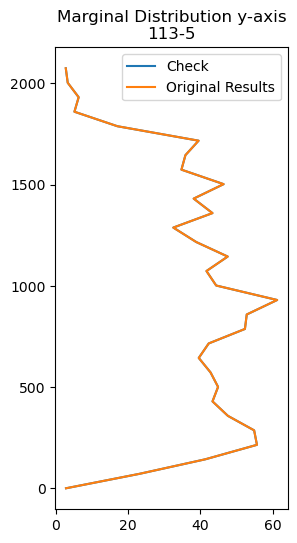

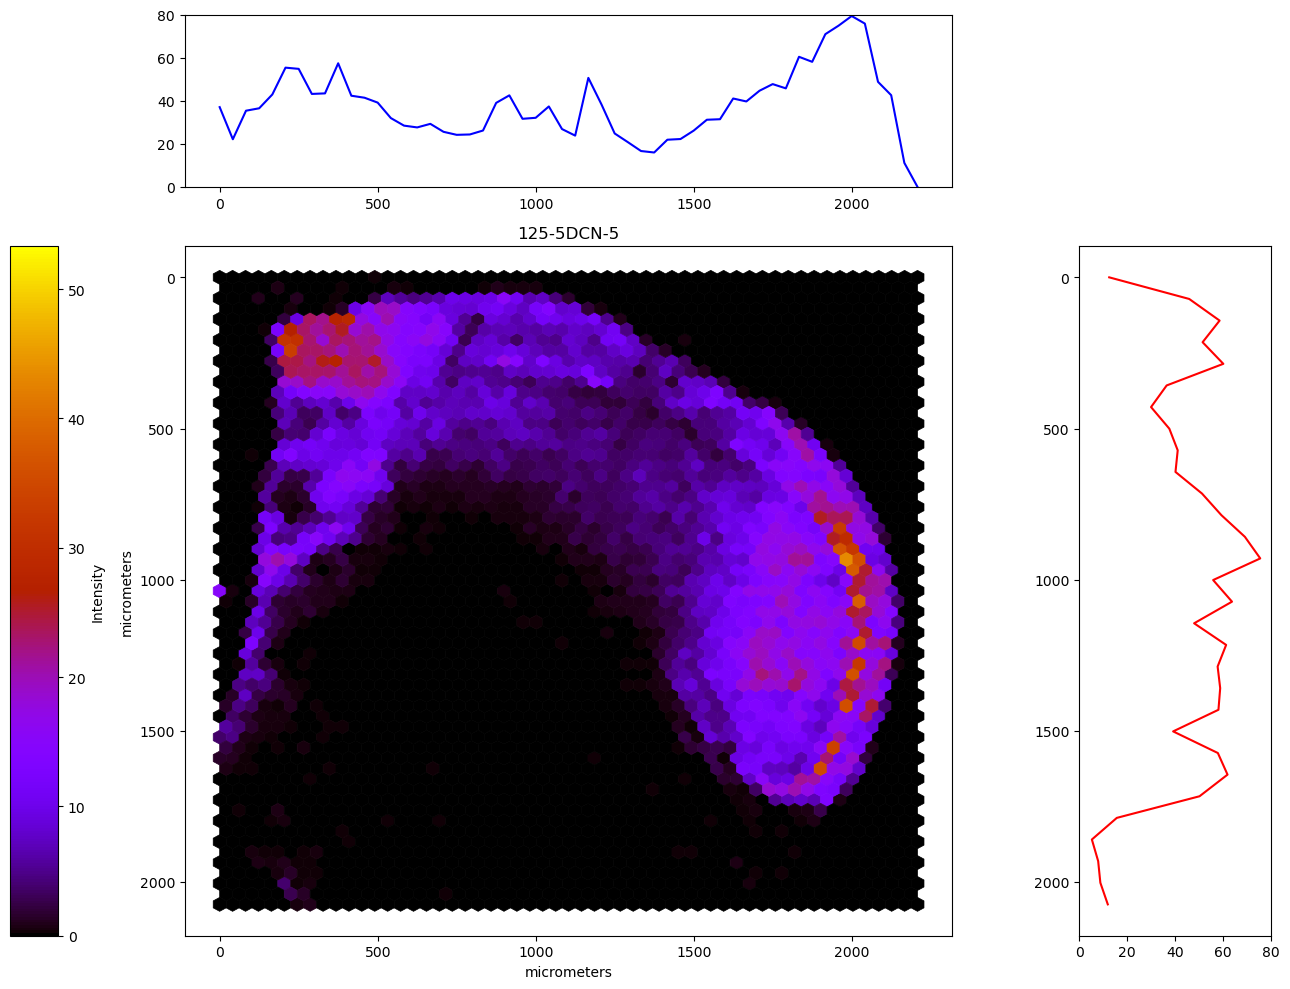

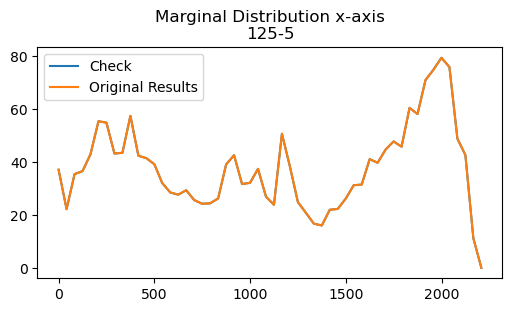

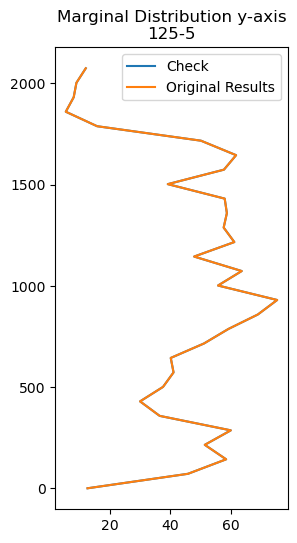

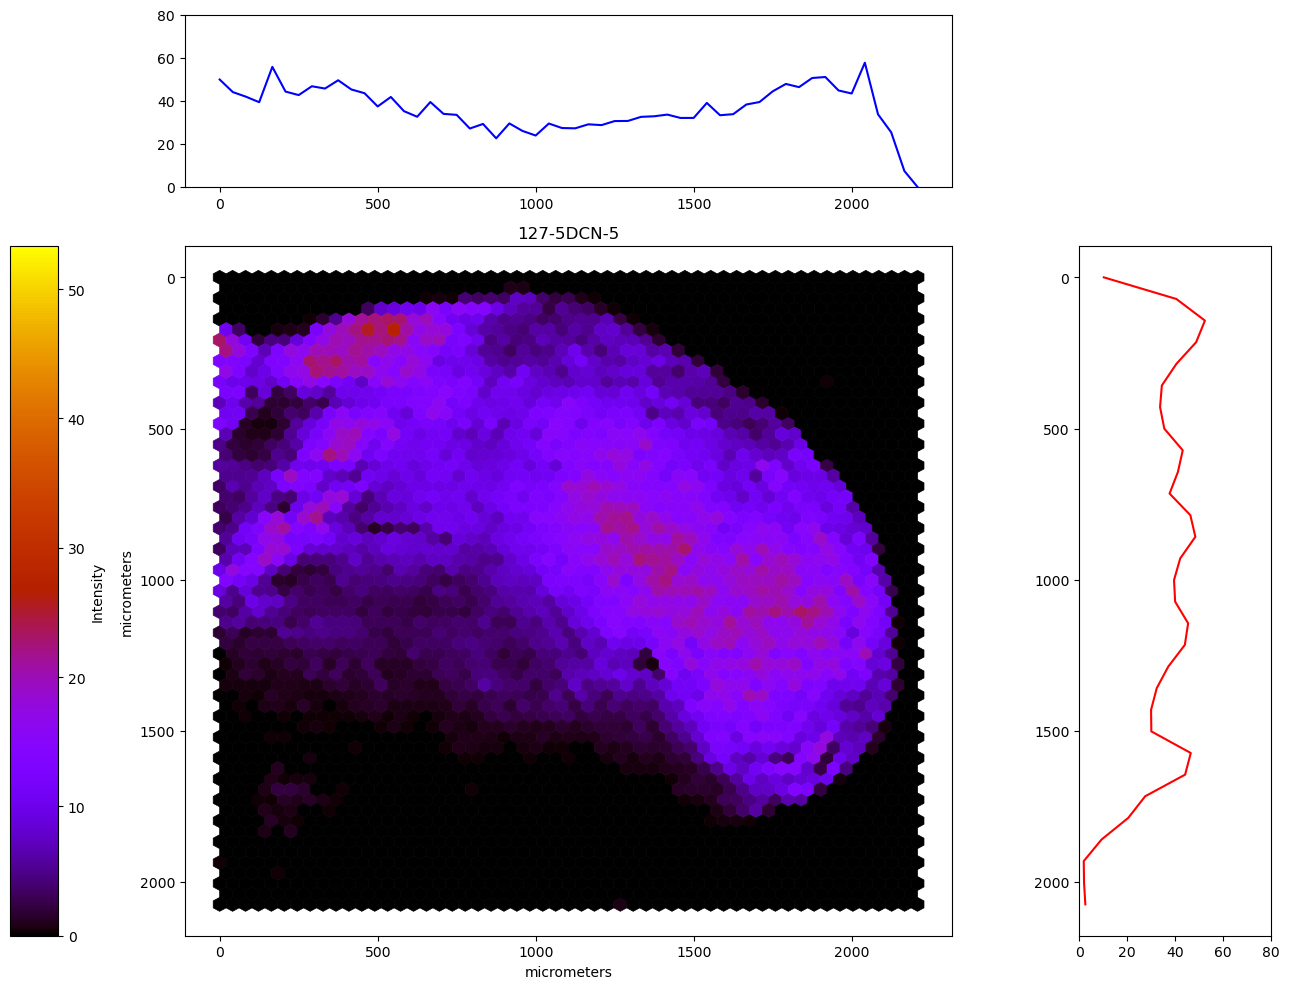

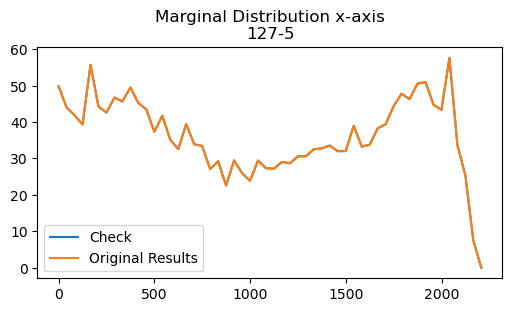

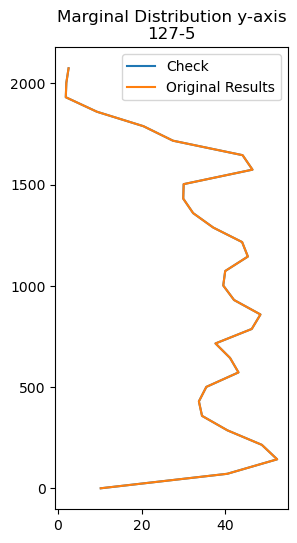

In [ ]:
for filepath in filepaths:
    # Step 1: Load the black and white images
    # ~Change Me~
    image = Image.open(filepath)

    #filepath = 'data/images/113-5.jpg'
    #image2 = Image.open("C:/Users/silvermanq/Desktop/113DCN_Vglut2_1ai.jpg")

    # Step 2: Convert the images to grayscale (if not already in grayscale)
    gray_image = image.convert('L')
    #gray_image2 = image2.convert('L')

    # Step 3: Extract pixel data
    # Convert the grayscale images into numpy arrays
    image_data = np.array(gray_image)
    #image_data2 = np.array(gray_image2)

    # Step 4: Average the pixel intensities
    average_image_data = (image_data) / 1

    # Step 5: Create the hexbin plot
    # Use numpy to get the x and y positions of each pixel
    x, y = np.meshgrid(np.arange(average_image_data.shape[1]), np.arange(average_image_data.shape[0]))

    # Flatten the arrays to 1D for hexbin plotting
    x = x.flatten()
    y = y.flatten()
    z = average_image_data.flatten()  # Averaged grayscale intensity values

    # %%


    # Create figure with custom layout
    # figsize scale to match original images (you'll just have to adjust this)
    # ~Change Me~
    fig = plt.figure(figsize=(13, 10))
    gs = plt.GridSpec(2, 3, height_ratios=[1, 4], width_ratios=[0.25, 4, 1])

    # Create main axes and marginal axes
    ax_main = fig.add_subplot(gs[1, 1])
    ax_marg_x = fig.add_subplot(gs[0, 1], sharex=ax_main)
    ax_marg_y = fig.add_subplot(gs[1, 2], sharey=ax_main)
    ax_colorbar = fig.add_subplot(gs[1, 0])

    # Define your desired maximum intensity value
    # ~Change Me~
    max_intensity = 80  # or any value you want

    # Create hexbin plot with vmax
    # Make sure to set the grid size match the ratio of the original images and weird math because of hexagons
    # [y=(desired bins)] [x=(desired bins * 1.73)*(x/y pixel ratio)]
    # ~Change Me~
    hb = ax_main.hexbin(x, y, C=z, gridsize=(54, 30), cmap='gnuplot', linewidths=0.5, edgecolors='face', vmax=max_intensity / 1.5)
    plt.colorbar(hb, cax=ax_colorbar, label='Intensity')

    # Step 6: Create marginal distributions
    # Calculate peak values and create bins
    z_reshape = z.reshape(average_image_data.shape)
    x_peaks = np.max(z_reshape, axis=0)
    y_peaks = np.max(z_reshape, axis=1)

    # Create evenly spaced points for x and y axes
    # Make sure to set number of points to match the grid size
    # ~Change Me~
    x_points = np.linspace(0, max(x), 54)
    y_points = np.linspace(0, max(y), 30)

    # Calculate binned values
    # Ensure the number of bins matches the number of points + 1
    # ~Change Me~
    x_bins = np.linspace(0, len(x_peaks), 55)
    y_bins = np.linspace(0, len(y_peaks), 31)

    x_digitized = np.digitize(np.arange(len(x_peaks)), x_bins)
    y_digitized = np.digitize(np.arange(len(y_peaks)), y_bins)

    x_binned = [np.mean(x_peaks[x_digitized == i]) for i in range(1, len(x_bins))]
    y_binned = [np.mean(y_peaks[y_digitized == i]) for i in range(1, len(y_bins))]

    # Plot data
    sns.lineplot(x=x_points, y=x_binned, ax=ax_marg_x, color='blue')
    sns.lineplot(x=y_binned, y=y_points, ax=ax_marg_y, color='red', orient='y')

    # Save marginal distributions as CSV
    # ~Change Me~
    dfx = pd.DataFrame({
        'x_points': x_points,
        'x_binned': x_binned,
    })
    savedir = Path("data/processed")
    savedir.mkdir(parents=True, exist_ok=True)
    savepath = savedir.joinpath(f'marginal_distributions_{filepath.stem}DCN5_x').with_suffix('.csv')
    dfx.to_csv(savepath, index=False)
    dfy = pd.DataFrame({
        'y_points': y_points,
        'y_binned': y_binned
    })
    savedir = Path("data/processed/")
    savedir.mkdir(parents=True, exist_ok=True)
    savepath = savedir.joinpath(f'marginal_distributions_{filepath.stem}DCN5_Y').with_suffix('.csv')
    dfy.to_csv(savepath, index=False)


    # Set y-axis limit for marginal x plot (intensity)
    ax_marg_x.set_ylim(0, max_intensity)
    # Set x-axis limit for marginal y plot (intensity)
    ax_marg_y.set_xlim(0, max_intensity)

    # Adjust appearance
    ax_marg_x.axis('on')
    ax_marg_y.axis('on')
    ax_main.invert_yaxis()
    ax_main.set_xlabel('micrometers')
    ax_main.set_ylabel('micrometers')
    ax_main.set_title(f'{filepath.stem}DCN-5')

    plt.tight_layout()

    # Save plot as SVG
    # ~Change Me~
    savedir = Path("Figures")
    savedir.mkdir(parents=True, exist_ok=True)
    savepath = savedir.joinpath(f'{filepath.stem}DCN5_averaged_hexbin').with_suffix('.svg')
    plt.savefig(savepath, format='svg', dpi=300, bbox_inches='tight')
    plt.show()



    ''' CHECK MARGINAL DISTRIBUTIONS '''

    # count of number of elements in each bin
    x_bin_sizes = Counter(x_digitized)

    # bin peak intensity in y-direction with same bin size as in above plots and compute mean intensity over bin
    x_grid_size = 54
    index_start = 0
    x_peaks_binned_mean = np.zeros((x_grid_size))
    for i, bin_nr in enumerate(x_bin_sizes.keys()):
        #print(index_start)
        index_stop = index_start+x_bin_sizes[bin_nr]
        x_peaks_binned_mean[i] = np.mean(x_peaks[index_start:index_stop])
        index_start += x_bin_sizes[bin_nr]

    # compare mean intensity on y-axis calculated with this approach to results above
    plt.figure(figsize=(6,3))
    plt.plot(x_points, x_peaks_binned_mean, label = 'Check')
    plt.plot(dfx['x_points'], dfx['x_binned'], label = 'Original Results')
    plt.title(f'Marginal Distribution x-axis\n{filepath.stem}')
    plt.legend()

    # count of number of elements in each bin
    y_bin_sizes = Counter(y_digitized)

    # bin peak intensity in y-direction with same bin size as in above plots and compute mean intensity over bin
    y_grid_size = 30
    index_start = 0
    y_peaks_binned_mean = np.zeros((y_grid_size))
    for i, bin_nr in enumerate(y_bin_sizes.keys()):
        #print(index_start)
        index_stop = index_start+y_bin_sizes[bin_nr]
        y_peaks_binned_mean[i] = np.mean(y_peaks[index_start:index_stop])
        index_start += y_bin_sizes[bin_nr]


    # compare mean intensity on y-axis calculated with this approach to results above
    plt.figure(figsize=(3,6))
    plt.plot(y_peaks_binned_mean, y_points, label = 'Check')
    plt.plot(dfy['y_binned'], dfy['y_points'], label = 'Original Results')
    plt.title(f'Marginal Distribution y-axis\n{filepath.stem}')
    plt.legend()


#### Check average image

In [ ]:
image_data_list = []
for filepath in filepaths:
    # Step 1: Load the black and white images
    # ~Change Me~
    image1 = Image.open(filepath)
    #image2 = Image.open("C:/Users/silvermanq/Desktop/113DCN_Vglut2_1ai.jpg")

    # Step 2: Convert the images to grayscale (if not already in grayscale)
    gray_image1 = image1.convert('L')
    #gray_image2 = image2.convert('L')

    # Step 3: Extract pixel data
    # Convert the grayscale images into numpy arrays
    image_data1 = np.array(gray_image1)
    #image_data2 = np.array(gray_image2)

    # Step 4: Add pixel intensities of individual images to list
    image_data_list.append(image_data1)

# Average 
average_image_data = np.mean(image_data_list, axis = 0)

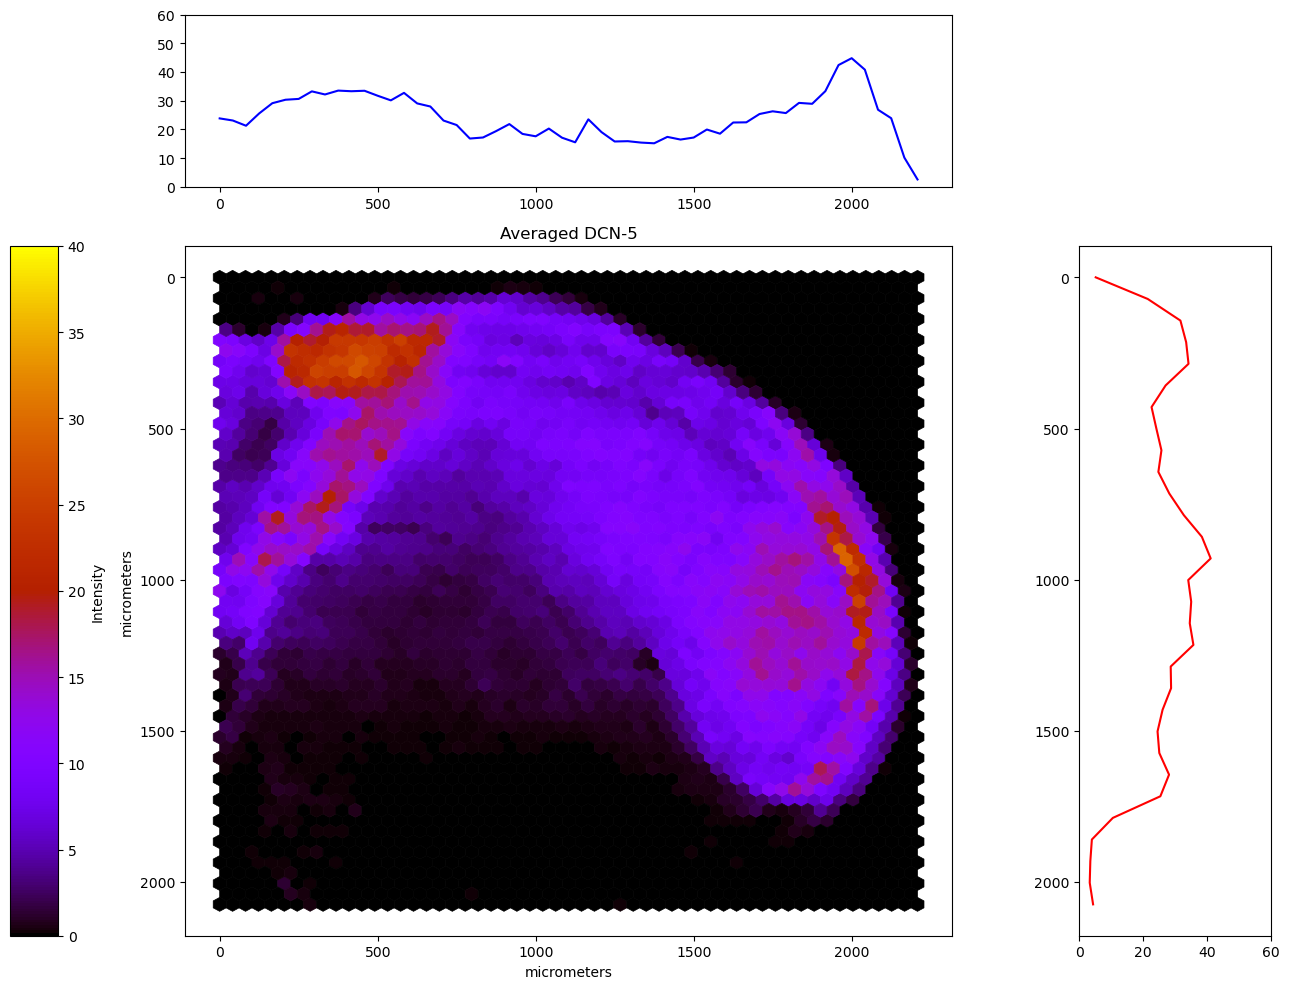

In [22]:
image_data_list = []
for filepath in filepaths:
    # Step 1: Load the black and white images
    # ~Change Me~
    image1 = Image.open(filepath)
    #image2 = Image.open("C:/Users/silvermanq/Desktop/113DCN_Vglut2_1ai.jpg")

    # Step 2: Convert the images to grayscale (if not already in grayscale)
    gray_image1 = image1.convert('L')
    #gray_image2 = image2.convert('L')

    # Step 3: Extract pixel data
    # Convert the grayscale images into numpy arrays
    image_data1 = np.array(gray_image1)
    #image_data2 = np.array(gray_image2)

    # Step 4: Add pixel intensities of individual images to list
    image_data_list.append(image_data1)

# Average 
average_image_data = np.mean(image_data_list, axis = 0)

# Step 5: Create the hexbin plot
# Use numpy to get the x and y positions of each pixel
x, y = np.meshgrid(np.arange(average_image_data.shape[1]), np.arange(average_image_data.shape[0]))

# Flatten the arrays to 1D for hexbin plotting
x = x.flatten()
y = y.flatten()
z = average_image_data.flatten()  # Averaged grayscale intensity values

# Create figure with custom layout
# figsize scale to match original images (you'll just have to adjust this)
# ~Change Me~
fig = plt.figure(figsize=(13, 10))
gs = plt.GridSpec(2, 3, height_ratios=[1, 4], width_ratios=[0.25, 4, 1])

# Create main axes and marginal axes
ax_main = fig.add_subplot(gs[1, 1])
ax_marg_x = fig.add_subplot(gs[0, 1], sharex=ax_main)
ax_marg_y = fig.add_subplot(gs[1, 2], sharey=ax_main)
ax_colorbar = fig.add_subplot(gs[1, 0])

# Define your desired maximum intensity value
# ~Change Me~
max_intensity = 60  # or any value you want

# Create hexbin plot with vmax
# Make sure to set the grid size match the ratio of the original images and weird math because of hexagons
# [y=(desired bins)] [x=(desired bins * 1.73)*(x/y pixel ratio)]
# ~Change Me~
hb = ax_main.hexbin(x, y, C=z, gridsize=(54, 30), cmap='gnuplot', linewidths=0.5, edgecolors='face', vmax=max_intensity / 1.5)
plt.colorbar(hb, cax=ax_colorbar, label='Intensity')

# Step 6: Create marginal distributions
# Calculate peak values and create bins
z_reshape = z.reshape(average_image_data.shape)
x_peaks = np.max(z_reshape, axis=0)
y_peaks = np.max(z_reshape, axis=1)

# Create evenly spaced points for x and y axes
# Make sure to set number of points to match the grid size
# ~Change Me~
x_points = np.linspace(0, max(x), 54)
y_points = np.linspace(0, max(y), 30)

# Calculate binned values
# Ensure the number of bins matches the number of points + 1
# ~Change Me~
x_bins = np.linspace(0, len(x_peaks), 55)
y_bins = np.linspace(0, len(y_peaks), 31)

x_digitized = np.digitize(np.arange(len(x_peaks)), x_bins)
y_digitized = np.digitize(np.arange(len(y_peaks)), y_bins)

x_binned = [np.mean(x_peaks[x_digitized == i]) for i in range(1, len(x_bins))]
y_binned = [np.mean(y_peaks[y_digitized == i]) for i in range(1, len(y_bins))]

# Plot data
sns.lineplot(x=x_points, y=x_binned, ax=ax_marg_x, color='blue')
sns.lineplot(x=y_binned, y=y_points, ax=ax_marg_y, color='red', orient='y')

# Save marginal distributions as CSV
# ~Change Me~
dfx = pd.DataFrame({
    'x_points': x_points,
    'x_binned': x_binned,
})
dfx.to_csv("data/processed/marginal_distributions_AveragedDCN5_X.csv", index=False)
dfy = pd.DataFrame({
    'y_points': y_points,
    'y_binned': y_binned
})
dfy.to_csv("data/processed/marginal_distributions_AveragedDCN5_Y.csv", index=False)

# Set y-axis limit for marginal x plot (intensity)
ax_marg_x.set_ylim(0, max_intensity)
# Set x-axis limit for marginal y plot (intensity)
ax_marg_y.set_xlim(0, max_intensity)

# Adjust appearance
# ~Change Me~
ax_marg_x.axis('on')
ax_marg_y.axis('on')
ax_main.invert_yaxis()
ax_main.set_xlabel('micrometers')
ax_main.set_ylabel('micrometers')
ax_main.set_title('Averaged DCN-5')

plt.tight_layout()

# Save plot as SVG
# ~Change Me~
plt.savefig("Figures/AveragedDCN5_averaged_hexbin.svg", format='svg', dpi=300, bbox_inches='tight')
plt.show()

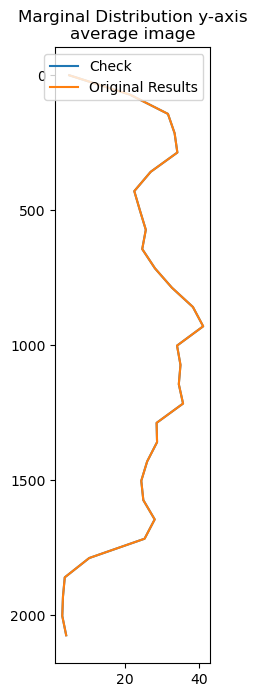

In [ ]:
from collections import Counter

# count of number of elements in each bin
y_bin_sizes = Counter(y_digitized)

# bin peak intensity in y-direction with same bin size as in above plots and compute mean intensity over bin
y_grid_size = 30
index_start = 0
y_peaks_binned_mean = np.zeros((y_grid_size))
for i, bin_nr in enumerate(y_bin_sizes.keys()):
    #print(index_start)
    index_stop = index_start+y_bin_sizes[bin_nr]
    y_peaks_binned_mean[i] = np.mean(y_peaks[index_start:index_stop])
    index_start += y_bin_sizes[bin_nr]


# compare mean intensity on y-axis calculated with this approach to results above
plt.figure(figsize=(2,7))
plt.plot(y_peaks_binned_mean, y_points, label = 'Check')
plt.plot(dfy['y_binned'], dfy['y_points'], label = 'Original Results')
plt.title('Marginal Distribution y-axis\naverage image')
plt.gca().invert_yaxis()
plt.legend()

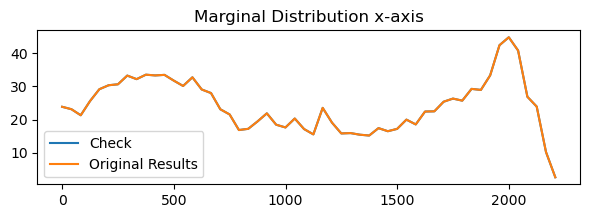

In [30]:
# count of number of elements in each bin
x_bin_sizes = Counter(x_digitized)

# bin peak intensity in y-direction with same bin size as in above plots and compute mean intensity over bin
x_grid_size = 54
index_start = 0
x_peaks_binned_mean = np.zeros((x_grid_size))
for i, bin_nr in enumerate(x_bin_sizes.keys()):
    #print(index_start)
    index_stop = index_start+x_bin_sizes[bin_nr]
    x_peaks_binned_mean[i] = np.mean(x_peaks[index_start:index_stop])
    index_start += x_bin_sizes[bin_nr]


# compare mean intensity on y-axis calculated with this approach to results above
plt.figure(figsize=(7,2))
plt.plot(x_points, x_peaks_binned_mean, label = 'Check')
plt.plot(dfx['x_points'], dfx['x_binned'], label = 'Original Results')
plt.title('Marginal Distribution x-axis')
plt.legend()